# Searching jpg file of SFA
## SFA-NonSkin

In [2]:
import os
result=[]
def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.jpg': 
                    #print(full_filename)  If you want to check, remove #
                    result.append(full_filename)
    except PermissionError:
        pass

search("/home/lab/dataset/skin_dataset/sfa_nonskin")

## Check image

In [3]:
import cv2
img = cv2.imread(result[0])

# Image reshape

## [:3,:3] => 3X3

In [4]:
import matplotlib.pyplot as plt

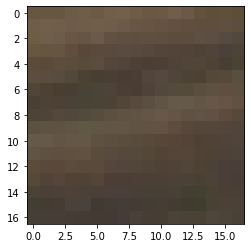

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
import cv2
test_result=[]
for i in range(100):
    img = cv2.imread(result[i])
    for j in range(len(img)-3):
        for k in range(len(img[0])-3):
            make_data=img[j:j+3,k:k+3]
            test_result.append(make_data)

In [7]:
import numpy as np
test_result=np.array(test_result)

In [8]:
test_result.shape

(19600, 3, 3, 3)

# SFA-Skin

In [9]:
import os
result1=[]
def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.jpg': 
                    #print(full_filename)
                    result1.append(full_filename)
    except PermissionError:
        pass

search("/home/lab/dataset/skin_dataset/sfa_skin")

In [10]:
test_result1=[]
for i in range(100):
    img = cv2.imread(result1[i])
    for j in range(len(img)-3):
        for k in range(len(img[0])-3):
            make_data=img[j:j+3,k:k+3]
            test_result1.append(make_data)

In [11]:
test_result1=np.array(test_result1)

In [12]:
test_result.shape,test_result1.shape

((19600, 3, 3, 3), (19600, 3, 3, 3))

In [13]:
A = [[1, 1, 0, 1, 1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1, 1, 0, 0, 0],
     [0 ,1, 1, 0, 1, 1, 0, 0, 0],
     [1, 1, 0, 1, 1, 0, 1, 1, 0],
     [1, 1, 1, 1, 1, 1, 1, 1, 1],
     [0, 1, 1, 0, 1, 1, 0, 1, 1],
     [0, 0, 0, 1, 1, 0, 1, 1, 0],
     [0, 0, 0, 1, 1, 1, 1, 1, 1],
     [0, 0, 0, 0, 1, 1, 0, 1, 1]]

In [14]:
A = np.matrix(A)

# A is Adjacency Matrix

# 3-dimension RGB => Convert to 5-dimension R,G,B,Cb,Cr

In [15]:
def YCbCrTransform(x):
    #================= exponancial function ==================#
    exponancial=[[65.738, 129.057, 25.064],
                 [-37.945, -74.494, 112.439],
                 [112.439, -94.154, -18.285]]
    exponancial=np.matrix(exponancial)
    exponancial=(1/256)*exponancial
    
    A=[[16],[128],[128]]
    A=np.matrix(A)
    #=========================================================#
    x=np.matrix(x)
    x=np.transpose(x)
    Answer=A+exponancial*x
    Answer=np.array(Answer)
    Answer=Answer.tolist()
    Cb=Answer[1][0]
    Cr=Answer[2][0]
    
    return Cb,Cr

In [16]:
def Make_redemention(x):
    before_result=[]
    for i in range(x.shape[0]):    #x.shape[0]
        before_result1=[]
        for j in range(x.shape[1]):
            before_result2=[]
            for k in range(x.shape[2]):
                before_result3=[]
                before=x[i][j][k]
                Cb,Cr=YCbCrTransform(before)
                before_result3.append(before[0])
                before_result3.append(before[1])
                before_result3.append(before[2])
                before_result3.append(Cb)
                before_result3.append(Cr)
                before_result2.append(before_result3)
            before_result1.append(before_result2)
        before_result.append(before_result1)
    return before_result

# 3X3 Convert 9X1

[1 2 3]  
[4 5 6]  
[7 8 9]  

[1]  
[2]  
[3]  
[4]  
[5]  
[6]  
[7]  
[8]  
[9]  
 

In [17]:
def reshape_demension(x):
    make_result=[]
    for i in range(x.shape[0]):
        make_result1=[]
        for j in range(x.shape[1]):
            for k in range(x.shape[2]):
                make_result1.append(x[i][j][k])
        make_result.append(make_result1)
    return make_result

In [18]:
AAA=Make_redemention(test_result)
BBB=Make_redemention(test_result1)

In [19]:
AAA=np.array(AAA,dtype=np.uint8)
BBB=np.array(BBB,dtype=np.uint8)
print(AAA[0][0])
AAA.shape[3]

[[ 66  86 103 138 118]
 [ 66  86 103 138 118]
 [ 66  86 103 138 118]]


5

In [20]:
AAA1=reshape_demension(AAA)
BBB1=reshape_demension(BBB)

In [21]:
AAA1=np.array(AAA1)
BBB1=np.array(BBB1)
#AAA1[2]
BBB1[2]

array([[ 59,  65, 100, 144, 122],
       [ 59,  65, 100, 144, 122],
       [ 50,  56,  91, 144, 122],
       [ 57,  63,  98, 144, 122],
       [ 60,  66, 101, 144, 122],
       [ 56,  62,  97, 144, 122],
       [ 58,  61,  99, 145, 123],
       [ 62,  66, 101, 143, 123],
       [ 59,  63,  98, 143, 123]], dtype=uint8)